# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [46]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/collaborations/barotono_disease_classification'

Import Data

In [47]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/collaborations/barotono_disease_classification/wmap_unthresh_Spatial_Rs.csv'
sheet = None

In [48]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,sub_id,dx,cat_dx,SV,BV,AD,CN,PNFA,CBS,PSP,PPMI,laterality_r
0,037_S_4001,AD,3,0.076181,-0.010366,0.109475,0.023184,-0.051431,-0.080201,0.046603,0.084348,0.019756
1,016_S_4009,AD,3,0.129927,0.131466,0.113704,0.039992,0.134409,0.161307,0.152146,-0.113114,0.115791
2,031_S_4024,AD,3,0.018923,-0.105131,0.294273,-0.023877,-0.001668,0.172366,-0.124286,0.029588,0.371979
3,014_S_4039,AD,3,0.065685,0.110528,0.403775,0.040915,0.070482,0.343782,0.105374,0.063445,0.215543
4,003_S_4136,AD,3,0.163385,0.215604,0.277804,0.036804,-0.047347,-0.065496,0.076585,0.052073,0.068824
...,...,...,...,...,...,...,...,...,...,...,...,...
900,140761,PPMI,8,0.199006,-0.011535,0.099851,-0.004850,-0.152921,-0.174433,-0.034053,0.235161,0.047267
901,141031,PPMI,8,-0.068866,-0.052251,0.032707,-0.080883,0.042646,0.009696,-0.100654,0.089500,0.160047
902,141696,PPMI,8,-0.026883,-0.053123,-0.098888,-0.046584,-0.051217,-0.125794,-0.111334,0.013090,0.042118
903,142957,PPMI,8,-0.100650,-0.022952,0.046475,0.064208,0.062876,0.026222,-0.035444,0.118706,0.023946


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [49]:
data_df.columns

Index(['sub_id', 'dx', 'cat_dx', 'SV', 'BV', 'AD', 'CN', 'PNFA', 'CBS', 'PSP',
       'PPMI', 'laterality_r'],
      dtype='object')

In [50]:
drop_list = ['Unnamed__11', 'Unnamed__12']

In [51]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

KeyError: ['Unnamed__11', 'Unnamed__12']

Drop Columns which Have NaNs

In [52]:
data_df.dropna(inplace=True, axis=1)
data_df

,sub_id,dx,cat_dx,SV,BV,AD,CN,PNFA,CBS,PSP,PPMI,laterality_r
0,037_S_4001,AD,3,0.076181,-0.010366,0.109475,0.023184,-0.051431,-0.080201,0.046603,0.084348,0.019756
1,016_S_4009,AD,3,0.129927,0.131466,0.113704,0.039992,0.134409,0.161307,0.152146,-0.113114,0.115791
2,031_S_4024,AD,3,0.018923,-0.105131,0.294273,-0.023877,-0.001668,0.172366,-0.124286,0.029588,0.371979
3,014_S_4039,AD,3,0.065685,0.110528,0.403775,0.040915,0.070482,0.343782,0.105374,0.063445,0.215543
4,003_S_4136,AD,3,0.163385,0.215604,0.277804,0.036804,-0.047347,-0.065496,0.076585,0.052073,0.068824
...,...,...,...,...,...,...,...,...,...,...,...,...
900,140761,PPMI,8,0.199006,-0.011535,0.099851,-0.004850,-0.152921,-0.174433,-0.034053,0.235161,0.047267
901,141031,PPMI,8,-0.068866,-0.052251,0.032707,-0.080883,0.042646,0.009696,-0.100654,0.089500,0.160047
902,141696,PPMI,8,-0.026883,-0.053123,-0.098888,-0.046584,-0.051217,-0.125794,-0.111334,0.013090,0.042118
903,142957,PPMI,8,-0.100650,-0.022952,0.046475,0.064208,0.062876,0.026222,-0.035444,0.118706,0.023946


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [53]:
data_df.columns

Index(['sub_id', 'dx', 'cat_dx', 'SV', 'BV', 'AD', 'CN', 'PNFA', 'CBS', 'PSP',
       'PPMI', 'laterality_r'],
      dtype='object')

Set the parameters for dropping rows

In [54]:
column = ''  # The column you'd like to evaluate
condition = ''  # The condition to check ('equal', 'above', 'below', 'not')
value = '' # The value to drop if found

In [55]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

ValueError: Condition '' is not supported.

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [56]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['cat_dx'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [57]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column sub_id
Unable to standardize column dx


,sub_id,dx,cat_dx,SV,BV,AD,CN,PNFA,CBS,PSP,PPMI,laterality_r
0,037_S_4001,AD,3,0.053752,-0.490996,0.307038,0.103143,-0.694988,-0.889048,-0.081340,0.460666,-0.734522
1,016_S_4009,AD,3,0.373780,0.423003,0.338381,0.353825,0.698685,0.950791,0.677699,-1.918319,-0.220650
2,031_S_4024,AD,3,-0.287184,-1.101689,1.676916,-0.598721,-0.321796,1.035043,-1.310336,-0.199066,1.150177
3,014_S_4039,AD,3,-0.008740,0.288073,2.488631,0.367585,0.219274,2.340910,0.341324,0.208831,0.313109
4,003_S_4136,AD,3,0.573002,0.965210,1.554834,0.306274,-0.664357,-0.777018,0.134282,0.071828,-0.471964
...,...,...,...,...,...,...,...,...,...,...,...,...
900,140761,PPMI,8,0.785106,-0.498533,0.235692,-0.314950,-1.456092,-1.606918,-0.661398,2.277637,-0.587313
901,141031,PPMI,8,-0.809913,-0.760915,-0.262032,-1.448909,0.010526,-0.204196,-1.140379,0.522736,0.016156
902,141696,PPMI,8,-0.559929,-0.766532,-1.237526,-0.937379,-0.693383,-1.236381,-1.217190,-0.397832,-0.614862
903,142957,PPMI,8,-0.999168,-0.572102,-0.159977,0.714981,0.162236,-0.078303,-0.671408,0.874606,-0.712100


# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [58]:
data_df.columns

Index(['sub_id', 'dx', 'cat_dx', 'SV', 'BV', 'AD', 'CN', 'PNFA', 'CBS', 'PSP',
       'PPMI', 'laterality_r'],
      dtype='object')

In [59]:
formula = "dx ~  SV + BV + CN + PNFA + CBS + PSP + AD + PPMI"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [60]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,SV,BV,CN,PNFA,CBS,PSP,AD,PPMI
0,1.0,0.053752,-0.490996,0.103143,-0.694988,-0.889048,-0.081340,0.307038,0.460666
1,1.0,0.373780,0.423003,0.353825,0.698685,0.950791,0.677699,0.338381,-1.918319
2,1.0,-0.287184,-1.101689,-0.598721,-0.321796,1.035043,-1.310336,1.676916,-0.199066
3,1.0,-0.008740,0.288073,0.367585,0.219274,2.340910,0.341324,2.488631,0.208831
4,1.0,0.573002,0.965210,0.306274,-0.664357,-0.777018,0.134282,1.554834,0.071828
...,...,...,...,...,...,...,...,...,...
900,1.0,0.785106,-0.498533,-0.314950,-1.456092,-1.606918,-0.661398,0.235692,2.277637
901,1.0,-0.809913,-0.760915,-1.448909,0.010526,-0.204196,-1.140379,-0.262032,0.522736
902,1.0,-0.559929,-0.766532,-0.937379,-0.693383,-1.236381,-1.217190,-1.237526,-0.397832
903,1.0,-0.999168,-0.572102,0.714981,0.162236,-0.078303,-0.671408,-0.159977,0.874606


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [61]:
outcome_matrix

,dx[AD],dx[BV],dx[CBS],dx[CN],dx[PNFA],dx[PPMI],dx[PSP],dx[SV]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
901,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
902,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [62]:
reference = 'dx[CN]'

In [63]:
ref_col = outcome_matrix.pop(reference)
outcome_matrix.insert(loc=0, column=reference, value=ref_col)
outcome_matrix

,dx[CN],dx[AD],dx[BV],dx[CBS],dx[PNFA],dx[PPMI],dx[PSP],dx[SV]
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
901,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
902,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 04 - Run the Regression

Regression Results Are Displayed Below

Option A) Logistic Regression between A Binary Outcome

In [64]:
import statsmodels.api as sm
# Fit the regression model
model = sm.Logit(outcome_matrix, design_matrix)
results = model.fit()
print(results.summary2())

ValueError: operands could not be broadcast together with shapes (905,8) (905,) 

Option B) Multinomial Logistic Regression
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [65]:
import statsmodels.api as sm
# Fit the regression model
model = sm.MNLogit(outcome_matrix, design_matrix)
results = model.fit()
print(results.summary2())
print("----INTERPRETATION KEY----")
for i, cat in enumerate(outcome_matrix.columns):
    if i==0:
        print(f"reference_category : {cat}")
    else:
        print(f"y={i-1} : {cat}")

Optimization terminated successfully.
         Current function value: 0.817858
         Iterations 10
                         Results: MNLogit
Model:              MNLogit          Pseudo R-squared: 0.516      
Dependent Variable: y                AIC:              1606.3239  
Date:               2024-04-03 16:40 BIC:              1909.2238  
No. Observations:   905              Log-Likelihood:   -740.16    
Df Model:           56               LL-Null:          -1529.4    
Df Residuals:       842              LLR p-value:      2.6756e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
   y = 0       Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.7841    0.1928  -4.0672  0.0000  -1.1620  -0.4062
       SV     -0.3440    0.4305  -0.7992  0.4242  -

# 05 - Get Classification Metrics
**A) Confusion Matrix**
- The index of the maximal prediction corresponds to the choice as ordered by outcome_matrix. 

Accuracy: 0.8511638843169528
Sensitivity: 0.8333333333333334
Specificity: 0.8775510204081632
PPV: 0.9096774193548387
NPV: 0.7806016597510375


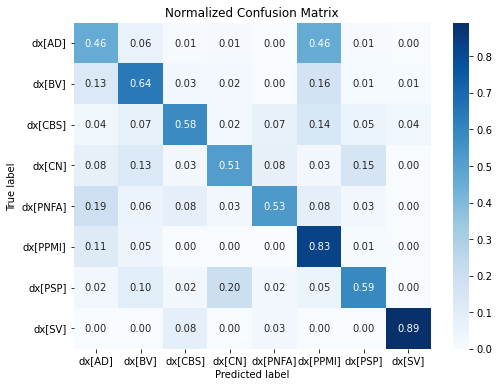

In [66]:
from calvin_utils.statistical_utils.classification_statistics import ClassificationEvaluation
classification_results = ClassificationEvaluation(results, outcome_matrix, normalization='true')
classification_results.run()

**B) Receiver Operating Characteristic**
- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

Accuracy: 0.8543689320388349
Sensitivity: 0.8333333333333334
Specificity: 0.8775510204081632
PPV: 0.8823529411764706
NPV: 0.8269230769230769


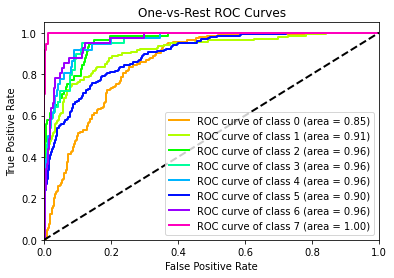

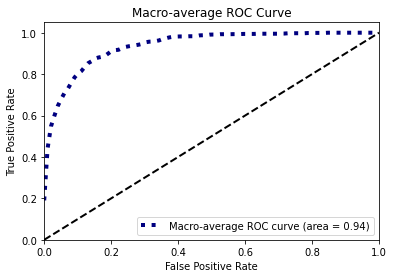

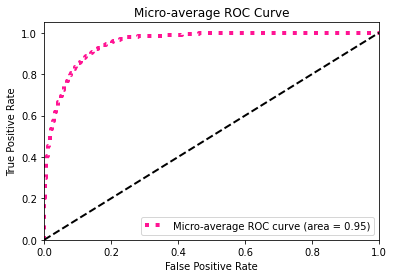

In [67]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix)
evaluator.run()

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [68]:
results.params

,0,1,2,3,4,5,6
Intercept,-0.784108,-2.670392,-5.060675,-3.211202,0.478919,-4.508657,-8.545977
SV,-0.344034,1.205230,1.623764,2.921303,0.239485,1.311669,4.817168
BV,0.160061,3.855510,-1.550134,-1.413584,0.824283,-1.368774,2.390659
CN,0.152328,0.459915,-1.208341,-0.121464,-0.242259,-1.359666,-0.205710
PNFA,0.578606,0.284143,-0.309013,3.538892,0.014862,0.157393,-0.033142
CBS,-0.341244,2.047514,2.893906,0.667985,0.833792,1.501616,2.135725
PSP,-0.320861,-2.562382,3.162049,0.036970,-1.281645,4.120388,-1.439976
AD,2.982439,-0.104482,-0.220583,-1.750703,-1.028995,-0.064194,0.459910
PPMI,-0.492391,-0.243214,-0.948374,0.173709,1.884370,-0.688346,-1.380319


In [21]:
from calvin_utils.statistical_utils.statistical_measurements import ForestPlot
import pandas as pd
import os
import forestplot as fp  # Assuming this is the library used for forestplot generation

class MultinomialForestPlot(ForestPlot):
    '''
    This class takes a fitted multinomial statsmodels model object (MNLogit)
    and generates a forest plot for the regression coefficients of each class
    with respect to the reference class.
    '''
    def prepare_multinomial_results(self):
        '''
        Method to extract results from a multinomial logistic regression model
        and prepare a dataframe for forest plot generation.
        '''
        # This will store the plot data for all classes
        self.all_data_for_plot = []

        # Loop over each model (one per class)
        for i in range(1, self.model.J):
            params = self.model.params.iloc[:, i - 1]
            conf = self.model.conf_int().iloc[:, [2 * (i - 1), 2 * (i - 1) + 1]]
            pvalues = self.model.pvalues.iloc[:, i - 1]
            variables = self.model.params.index
            group = [f'Class {i}'[::]] * len(variables)

            # Preparing the data for the forest plot
            data_for_plot = pd.DataFrame({
                'estimate': params.values,
                'll': conf.iloc[:, 0].values,
                'hl': conf.iloc[:, 1].values,
                'label': variables,
                'pvalue': pvalues.values,
                'group': group
            })

            # Appending the results to the list
            self.all_data_for_plot.append(data_for_plot)


    def create_and_display_multinomial_forest_plot(self):
        '''
        Generate and display forest plots for each class in the multinomial regression model.
        '''
        for data_for_plot in self.all_data_for_plot:
            self.data_for_plot = data_for_plot  # Set current data
            self.table_prep()  # Prepare table if necessary
            self.create_and_display_forest_plot()  # Display plot

    def run(self):
        '''
        Orchestrator method for multinomial forest plot.
        '''
        self.prepare_multinomial_results()
        self.create_and_display_multinomial_forest_plot()
        self.figure_saver()

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=out_dir, table=False)
multinomial_forest.run()

NameError: name 'results' is not defined

# 07 - Visualize the Partial Regression Plots

In [22]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir, palette='Reds')
partial_plot = partial_plot.run()

NameError: name 'results' is not defined

# 08 - Generate Partial Dependence Plots

,Intercept,SV,BV,CN,PNFA,CBS,PSP,AD,PPMI
0,1,-1,-1,-1,-1,-1,-1,-1,-1.000000
1,1,-1,-1,-1,-1,-1,-1,-1,-0.979798
2,1,-1,-1,-1,-1,-1,-1,-1,-0.959596
3,1,-1,-1,-1,-1,-1,-1,-1,-0.939394
4,1,-1,-1,-1,-1,-1,-1,-1,-0.919192
...,...,...,...,...,...,...,...,...,...
95,1,-1,-1,-1,-1,-1,-1,-1,0.919192
96,1,-1,-1,-1,-1,-1,-1,-1,0.939394
97,1,-1,-1,-1,-1,-1,-1,-1,0.959596
98,1,-1,-1,-1,-1,-1,-1,-1,0.979798


,SV_predictions,SV,BV_predictions,BV,CN_predictions,CN,PNFA_predictions,PNFA,CBS_predictions,CBS,PSP_predictions,PSP,AD_predictions,AD,PPMI_predictions,PPMI
0,0.028133,-1.000000,0.028133,-1.000000,0.028133,-1.000000,0.028133,-1.000000,0.028133,-1.000000,0.028133,-1.000000,0.028133,-1.000000,0.028133,-1.000000
1,0.027901,-0.979798,0.028077,-0.979798,0.028260,-0.979798,0.028451,-0.979798,0.027799,-0.979798,0.028179,-0.979798,0.030019,-0.979798,0.027533,-0.979798
2,0.027670,-0.959596,0.028018,-0.959596,0.028388,-0.959596,0.028772,-0.959596,0.027467,-0.959596,0.028220,-0.959596,0.032024,-0.959596,0.026938,-0.959596
3,0.027441,-0.939394,0.027958,-0.939394,0.028516,-0.939394,0.029097,-0.939394,0.027137,-0.939394,0.028257,-0.939394,0.034155,-0.939394,0.026346,-0.939394
4,0.027214,-0.919192,0.027896,-0.919192,0.028644,-0.919192,0.029425,-0.919192,0.026809,-0.919192,0.028290,-0.919192,0.036420,-0.919192,0.025759,-0.919192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.011167,0.919192,0.013982,0.919192,0.042108,0.919192,0.057746,0.919192,0.006464,0.919192,0.011700,0.919192,0.924247,0.919192,0.000900,0.919192
96,0.011002,0.939394,0.013684,0.939394,0.042277,0.939394,0.057199,0.939394,0.006339,0.939394,0.011196,0.939394,0.928442,0.939394,0.000860,0.939394
97,0.010837,0.959596,0.013382,0.959596,0.042446,0.959596,0.056598,0.959596,0.006216,0.959596,0.010696,0.959596,0.932421,0.959596,0.000821,0.959596
98,0.010670,0.979798,0.013076,0.979798,0.042616,0.979798,0.055944,0.979798,0.006095,0.979798,0.010201,0.979798,0.936192,0.979798,0.000784,0.979798


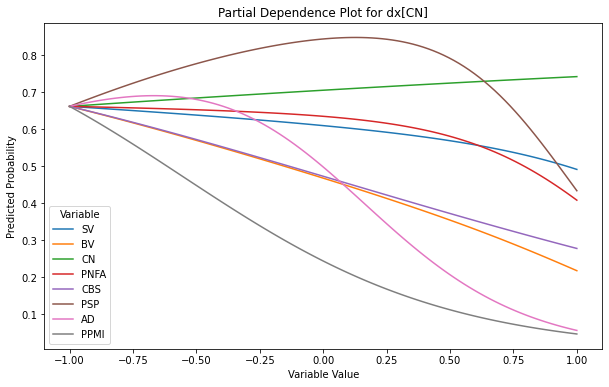

In [85]:
# from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
from calvin_utils.statistical_utils.statistical_measurements import EMMPlot
import os
import re
import patsy 
import numpy as np
import statsmodels
import seaborn as sns
from typing import Type
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Imports for Forest Plot
import numpy as np
import forestplot as fp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For PDD
import statsmodels.discrete.discrete_model as smd

class PartialDependencePlot(EMMPlot):
    """
    This is a partial dependence plot class. 
    It will hold all variables except one at their means, and vary the last across its range in incremental steps. 
    It will then make predictions, seeing how the prediction changes as a a funciton of this one variable.
    
    This class is generated for use in logistic regressions. 
    It will create a dictionary containing one dataframe per each classification.
    Each dataframe will contain the predictions for each classification and the dynamic range of data. 
    """
    def __init__(self, formula, data_df, model, design_matrix, outcomes_df=None, data_range=None, out_dir=None, marginal_method='mean', debug=False):
        """
        Args:
            formula: str
                - this is the formula provided to the regression method 
            data_df: pd.DataFrame
                - this is the dataframe which was contains all your regressors and your observations.
            model: StatsModels.Model instance
                - this is the model which was fitted to the regression method
            design_matrix: pd.DataFrame
                - This is the dataframe acting as the design matrix generated in my regression notebooks.
            outcomes_df: pd.DataFrame (Optional)
                - this is the dataframe which contains the observations. 
            data_range: tuple (optional)
                - This specifies the maximum and minimum values to vary the variable of interest over. 
                    If not entered, will default to minimum and maximum values of the variable. 
            out_dir: string (optional)
                - If set, this will be the directory where the figures are saved. 
            marginal_method = str | mean | min | max | absmin | absmax
                - This determines how we will hold all variables aside from the variable of interest.
                    We can set them to their mean, their minimum, or their maximum. 
                    absmin and absmax will set the value to the absolute lowest value in the dynamic range. 
                    min and max will set the value to the min or max of the observed input value for that variable.
        """
        super().__init__(formula, data_df, model)
        self.design_matrix = design_matrix
        self.outcomes_df = outcomes_df
        self.results_dict = dict()
        self.data_range = data_range
        self.out_dir = out_dir
        self.marginal_method = marginal_method
        self.debug = debug
        
    def partial_dependence_plots(self):
        """
        This method will create a figure for each classification. Each figure will include lines for each variable,
        showing how the prediction changes with the variable, allowing for comparison of variable effects within each classification.
        """
        num_variables = len(self.variables_df['Variable'])
    
        # Selecting the color palette by number of variables
        if num_variables <= 10:
            palette = sns.color_palette("tab10", n_colors=num_variables)
        elif num_variables <= 20:
            palette = sns.color_palette("tab20", n_colors=num_variables)
        else:
            # Creating a colormap for more than 20 variables
            cmap = plt.cm.get_cmap('hsv', num_variables)
            palette = [cmap(i) for i in range(num_variables)]
            
        # Generate the Plots
        for classification, results_df in self.results_dict.items():
            plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
            plt.title(f"Partial Dependence Plot for {classification}")
            
            for variable in self.variables_df['Variable']:
                sns.lineplot(x=results_df[f'{variable}'], y=results_df[f'{variable}_predictions'], label=variable, palette=palette)
            
            plt.xlabel("Variable Value")
            plt.ylabel("Predicted Probability")
            plt.legend(title="Variable")
            if self.out_dir is not None:
                plt.savefig(os.path.join(self.out_dir, f'pdp_{classification}.svg'))
                plt.savefig(os.path.join(self.out_dir, f'pdp_{classification}.png'))
            plt.show()
            
            
    def partial_dependence_prediction(self, partial_dependence_df, variable_name, prediction_index):
        """
        This method will take the partial_dependence_df and make a prediction on it.
        The predictions will be stored in self.results_df, as will the range of the continuous variable. 
        
        The hard part, especially for a multinomial logit, is that each prediction yields N predictions. 
        The maximal prediction is the model's 'choice', but this is not correct for partial dependence. 
        We need to find the value of the prediction at the index of our predictor. 
        """
        
        # This will return a pandas dataframe of predictions
        predictions = self.model.predict(partial_dependence_df)
        if self.debug and variable_name == 'PPMI':
            print("PDP")
            display(partial_dependence_df)
            display(predictions)
        # This gets the prediction associated with our class of interest
        self.results_df[f'{variable_name}_predictions'] = predictions.loc[:, prediction_index]
        self.results_df[variable_name] = partial_dependence_df.loc[:, variable_name]

    def partial_dependence_df(self, variable_name:str, variable_type:str):
        """
        This method will take the variable, the type, and create a new dataframe based upon it. 
        This dataframe will be used for predictions.
        
        Essentially, the variable of interest varies from min to max in 100 steps. 
        All of the other variables are held at their means. 
        For categorical features, the partial dependence is very easy to calculate. 
        
        TODO:
        For each of the categories, we get a PDP estimate by forcing all data instances to have the same category.
        For example, if we look at the bike rental dataset and are interested in the partial dependence plot for the season, 
        we get four numbers, one for each season. To compute the value for “summer”, we replace the season of all data instances
        with “summer” and average the predictions.
        """
        if variable_type != 'continuous':
            raise ValueError(f"{variable_type} variables are not supported yet. Please use continuous variables instead.")
        
        # Intialize the dataframe
        partial_dependence_df = pd.DataFrame(np.nan, index=range(100), columns=self.variables_df['Variable'])
        partial_dependence_df['Intercept'] = 1
        for variable in self.variables_df['Variable']:
            # Range our variable of interest across a dynamic range. 
            if variable==variable_name:
                if self.data_range is None: 
                    partial_dependence_df[variable_name] = np.linspace(np.min(self.data_df[variable_name]), np.max(self.data_df[variable_name]), 100)
                else:
                    partial_dependence_df[variable_name] = np.linspace(self.data_range[0], self.data_range[1], 100)
            # Hold variables which are not our variables of interest constant at mean
            else:
                if self.marginal_method == 'mean':
                    partial_dependence_df[variable] = np.mean(self.data_df[variable])  
                elif self.marginal_method == 'min':
                    partial_dependence_df[variable] = np.min(self.data_df[variable])  
                elif self.marginal_method == 'max':
                    partial_dependence_df[variable] = np.max(self.data_df[variable])  
                elif self.marginal_method == 'absmin':
                    partial_dependence_df[variable] = self.data_range[0] if self.data_range is not None else np.min(self.data_df)  
                elif self.marginal_method == 'absmax':
                    partial_dependence_df[variable] = self.data_range[1] if self.data_range is not None else np.max(self.data_df)  
                else:
                    raise TypeError("Invalid marginal method: %s" % self.marginal_method)       
        partial_dependence_df = partial_dependence_df.loc[:, self.design_matrix.columns]
        return partial_dependence_df   
    
    def orchestrate_marginal_predictions(self):
        """
        This method is going to iterate over each variable, getting its estimated marginal means. 
        We will pass each variable, identifying it as the variable to vary. 
        We will flag the type of the variable, continuous or categorical. 
        
        Notes:
        We need to generate a dataframe of results for each potential class of observations. 
        There are only >1  classes of observations in  binomial logits.
        There are only >2 classes of observations in multinomial logits and MANOVAs or GLMs with numerous prediction classes.
        """
        for i, observation in enumerate(self.outcomes_df.columns):
            # Initialize a new DF for each classification
            self.results_df = pd.DataFrame()
            for index, row in self.variables_df.iterrows():
                # Set up the Data
                partial_dependence_df = self.partial_dependence_df(row['Variable'], row['Type'])
                # Predict the data and assign it to the results_df
                self.partial_dependence_prediction(partial_dependence_df, row['Variable'], i)
            if i > 0 and self.debug:
                display(partial_dependence_df)
                self.pdddf = partial_dependence_df
                display(self.results_df)
                break
            # Store results DF for this classification
            self.results_dict[observation] = self.results_df
            
    def validate_model(self):
        """
        This is an initial check to make sure we are okay to begin. 
        If the appropriate data for the model has been entered, we will then relate the index of predictions
        to the class of the prediction. 
        """
        if isinstance(self.model, smd.MNLogit) or isinstance(self.model, smd.Logit):
            if self.outcomes_df is None:
                raise TypeError("Logistic model detected, but outcomes_df is none. \n You must enter the dataframe containing the observations. ")
                    
    def run(self):
        """
        Orchestration Method
        """
        self.validate_model()
        self.extract_unique_variables()
        self.orchestrate_marginal_predictions()
        self.partial_dependence_plots()
        
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=(-1,1), out_dir=None, marginal_method='absmin', debug=True)
pdp.run()

In [87]:
t = design_matrix.copy()
import numpy as np
t.loc[:, :] = 0
t.loc[:, ['Intercept']] = 1
t.loc[:, ['CN']] = -1
t.loc[:, ['SV']] = -1
t.loc[:, ['BV']] = -1
t.loc[:, ['PNFA']] = -1
t.loc[:, ['CBS']] = -1
t.loc[:, ['PSP']] = -1
t.loc[:, ['AD']] = -1
t.loc[:, ['PPMI']] =  np.linspace(-1,1, 905).reshape(-1,1)
t

,Intercept,SV,BV,CN,PNFA,CBS,PSP,AD,PPMI
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.997788
2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.995575
3,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.993363
4,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.991150
...,...,...,...,...,...,...,...,...,...
900,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.991150
901,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.993363
902,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.995575
903,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.997788


In [92]:
y = results.predict(t)
y.columns = outcome_matrix.columns
y

,dx[CN],dx[AD],dx[BV],dx[CBS],dx[PNFA],dx[PPMI],dx[PSP],dx[SV]
0,0.662467,0.028133,0.000327,0.000134,0.000464,0.308277,0.000197,1.515915e-07
1,0.661636,0.028068,0.000327,0.000134,0.000463,0.309176,0.000197,1.509396e-07
2,0.660803,0.028002,0.000326,0.000133,0.000463,0.310077,0.000196,1.502899e-07
3,0.659968,0.027936,0.000326,0.000133,0.000463,0.310979,0.000196,1.496425e-07
4,0.659132,0.027870,0.000325,0.000132,0.000462,0.311883,0.000195,1.489972e-07
...,...,...,...,...,...,...,...,...
900,0.047973,0.000764,0.000015,0.000001,0.000047,0.951196,0.000004,7.028761e-10
901,0.047783,0.000760,0.000015,0.000001,0.000047,0.951390,0.000004,6.979600e-10
902,0.047594,0.000757,0.000014,0.000001,0.000047,0.951583,0.000004,6.930777e-10
903,0.047405,0.000753,0.000014,0.000001,0.000047,0.951776,0.000004,6.882290e-10


In [93]:
pdp.pdddf

,Intercept,SV,BV,CN,PNFA,CBS,PSP,AD,PPMI
0,1,-1,-1,-1,-1,-1,-1,-1,-1.000000
1,1,-1,-1,-1,-1,-1,-1,-1,-0.979798
2,1,-1,-1,-1,-1,-1,-1,-1,-0.959596
3,1,-1,-1,-1,-1,-1,-1,-1,-0.939394
4,1,-1,-1,-1,-1,-1,-1,-1,-0.919192
...,...,...,...,...,...,...,...,...,...
95,1,-1,-1,-1,-1,-1,-1,-1,0.919192
96,1,-1,-1,-1,-1,-1,-1,-1,0.939394
97,1,-1,-1,-1,-1,-1,-1,-1,0.959596
98,1,-1,-1,-1,-1,-1,-1,-1,0.979798


In [94]:
yx = results.predict(pdp.pdddf)
yx.columns = outcome_matrix.columns
yx

,dx[CN],dx[AD],dx[BV],dx[CBS],dx[PNFA],dx[PPMI],dx[PSP],dx[SV]
0,0.662467,0.028133,0.000327,0.000134,0.000464,0.308277,0.000197,1.515915e-07
1,0.654820,0.027533,0.000322,0.000130,0.000460,0.316542,0.000192,1.457210e-07
2,0.647052,0.026938,0.000317,0.000126,0.000456,0.324924,0.000187,1.400326e-07
3,0.639167,0.026346,0.000311,0.000122,0.000452,0.333418,0.000183,1.345222e-07
4,0.631169,0.025759,0.000306,0.000118,0.000448,0.342021,0.000178,1.291859e-07
...,...,...,...,...,...,...,...,...
95,0.054551,0.000900,0.000017,0.000002,0.000053,0.944472,0.000004,8.827211e-10
96,0.052623,0.000860,0.000016,0.000002,0.000052,0.946444,0.000004,8.281057e-10
97,0.050759,0.000821,0.000016,0.000002,0.000050,0.948348,0.000004,7.768119e-10
98,0.048958,0.000784,0.000015,0.000002,0.000048,0.950189,0.000004,7.286430e-10


Enjoy.

-- Calvin